In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# Load the data
fuel_df = pd.read_csv("data/fuel.csv")
ev_df = pd.read_csv("data/ev.csv")
registrations_df = pd.read_csv("data/evRegis.csv")

``Fuel Consumption Visualization``

Fuel Consumption between fuel based cars and EV based cars

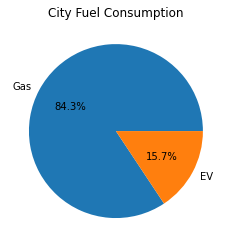

In [3]:
city_fuel = fuel_df["City (L/100 km)"].mean()
city_ev = ev_df["City (Le/100 km)"].mean()

# Create pie chart based on city_fuel and city_ev
plt.title("City Fuel Consumption")
plt.pie([city_fuel, city_ev], labels=["Gas", "EV"], autopct="%1.1f%%")
plt.show()

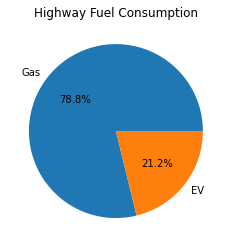

In [4]:
highway_fuel = fuel_df["Hwy (L/100 km)"].mean()
highway_ev = ev_df["Hwy (Le/100 km)"].mean()

plt.title("Highway Fuel Consumption")
plt.pie([highway_fuel, highway_ev], labels=["Gas", "EV"], autopct="%1.1f%%")
plt.show()

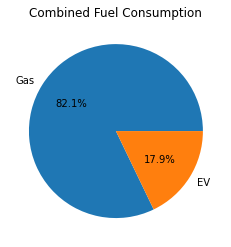

In [5]:
comb_fuel = fuel_df["Comb (L/100 km)"].mean()
comb_ev = ev_df["Comb (Le/100 km)"].mean()

plt.title("Combined Fuel Consumption")
plt.pie([comb_fuel, comb_ev], labels=["Gas", "EV"], autopct="%1.1f%%")
plt.show()

``New EV car registrations from 2017-2022``

Ever since the government released the rebait program the ev and hybrid adoption has increased.

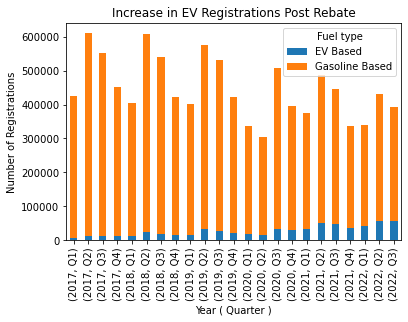

In [6]:
# How to create a stacked bar chart between fuel types of Gasoline and battery electric and year as the x axis which further breaks down the fuel types by quarter

grouped_df = registrations_df.groupby(['Fuel type', 'Year', 'Quarter'])['Value'].sum().reset_index()

pivoted_df = grouped_df.pivot_table(index=['Year', 'Quarter'], columns='Fuel type', values='Value')

pivoted_df["EV Based"] = pivoted_df["Battery electric"] + pivoted_df["Plug-in hybrid electric"] + pivoted_df["Hybrid electric"]
pivoted_df["Gasoline Based"] = pivoted_df["Gasoline"] + pivoted_df["Diesel"]

pivoted_df.drop(['Battery electric', 'Plug-in hybrid electric', 'Hybrid electric', 'Gasoline', 'Diesel'], axis=1, inplace=True)

# Create stacked bar chart
pivoted_df.plot(kind='bar', stacked=True)

# Display the plot
plt.title("Increase in EV Registrations Post Rebate")
plt.xlabel("Year ( Quarter )")
plt.ylabel("Number of Registrations")
plt.show()